In [41]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [82]:
data = pd.read_csv("onlinefraud.csv")
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [29]:
data.shape

(6362620, 11)

In [31]:
# Now, let’s have a look at whether this dataset has any null values or not

print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [33]:
# Exploring transaction type
print(data.type.value_counts())

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


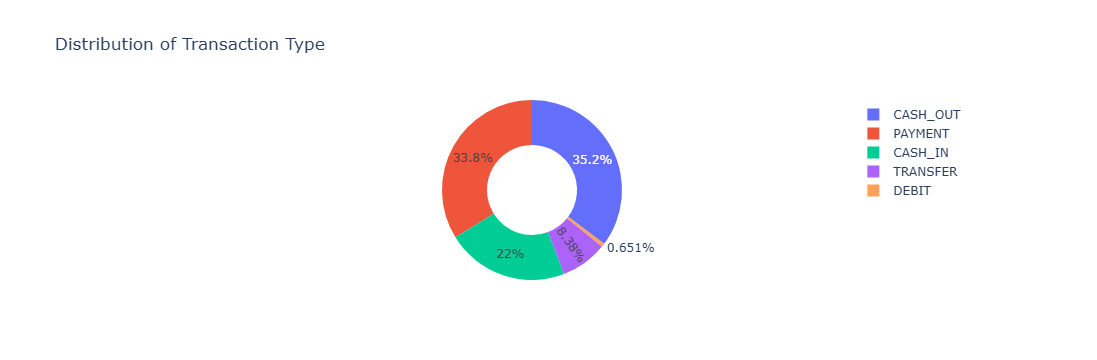

In [35]:
type = data["type"].value_counts()
transactions = type.index
quantity = type.values
figure = px.pie(data, values=quantity, names=transactions, hole = 0.5, title="Distribution of Transaction Type")
figure.show()

In [84]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode the 'type', 'nameOrig', and 'nameDest' columns
data["type_encoded"] = label_encoder.fit_transform(data["type"])
data["nameOrig_encoded"] = label_encoder.fit_transform(data["nameOrig"])
data["nameDest_encoded"] = label_encoder.fit_transform(data["nameDest"])

# Drop the original string columns
data_numeric = data.drop(columns=["type", "nameOrig", "nameDest"])

In [85]:
# Now let’s have a look at the correlation between the features of the data with the isFraud column
# Checking correlation

# Drop the 'type' column for correlation calculation
correlation = data_numeric.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud             1.000000
amount              0.076688
isFlaggedFraud      0.044109
step                0.031578
type_encoded        0.020833
oldbalanceOrg       0.010154
newbalanceDest      0.000535
nameOrig_encoded   -0.000464
oldbalanceDest     -0.005885
newbalanceOrig     -0.008148
nameDest_encoded   -0.021963
Name: isFraud, dtype: float64


In [86]:
# Now let’s transform the categorical features into numerical. Here we will also transform the values of the isFraud column into 
# No Fraud and Fraud labels to have a better understanding of the output
# Changing CASH_OUT to 1, PAYMENT to 2, CASH_IN to 3, TRANSFER to 4 and DEBIT to 5 

data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_encoded,nameOrig_encoded,nameDest_encoded
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0,3,757869,1662094
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0,3,2188998,1733924
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0,4,1002156,439685
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0,1,5828262,391696
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0,3,3445981,828919


In [57]:
# splitting the data

x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

In [59]:
# training a machine learning model

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9997296711103287


In [63]:
# prediction
#features = [type, amount, oldbalanceOrg, newbalanceOrig]

features = np.array([[1, 8900.2, 8990.2, 0.0]])
print(model.predict(features))

['Fraud']


In [65]:
features = np.array([[4, 9000.60, 9000.60, 0.0]])
print(model.predict(features))

['Fraud']
